# WeatherPy
----


## Configuration Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import random
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets, linear_model


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output Folder Path
Output_Folder = "output_data/"

# Output Weather File (CSV)
weather_data_csv = f"{Output_Folder}weather_data.csv"

# Output Log File (TXT)
weather_data_log =f"{Output_Folder}weather_data_log"

# Open Weather API URL 
url = "https://api.openweathermap.org/data/2.5/weather?"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

620


### Perform API Calls

In [3]:
# List for holding the Data to be stored
CityID = []
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
MaxTemp = []
WindSpeed = []

# Open TXT to write the logfile
weather_log_file=open(weather_data_log,'w')

#Api Call loop
for each, city in enumerate(cities):
    
    #Print to terminal and to TXT file Output Results Header
    if each==0:
        print("Beginning Data Retrieval")
        print("-----------------------------")
        
        weather_log_file.write("Beginning Data Retrieval")
        weather_log_file.write("-----------------------------")
        weather_log_file.write('\n')
        
    # Get weather data
    weather_response = requests.get(url + "&units=imperial" + "&appid=" + weather_api_key + "&q=" + city)
    weather_json = weather_response.json()
    
    # Read data from response and append the information needed into different lists
    try:
        CityID.append(weather_json['id'])    
        City.append(weather_json['name'])
        Cloudiness.append(weather_json['clouds']['all'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        Humidity.append(weather_json['main']['humidity'])
        Lat.append(weather_json['coord']['lat'])
        Lng.append(weather_json['coord']['lon'])
        MaxTemp.append(weather_json['main']['temp_max'])
        WindSpeed.append(weather_json['wind']['speed'])
     # Print to terminal and TXT file the successful data process of each record  
        print(f"Processing Record {each} of Set 1 | {weather_json['name']}")
        weather_log_file.write(f"Processing Record {each} of Set 1 | {weather_json['name']}")
        weather_log_file.write('\n')
    
     # Print to terminal and TXT file the successful if a record was not found                            
    except (KeyError, UnicodeEncodeError):
        print("City not found. Skipping...")
        weather_log_file.write("City not found. Skipping...")
        weather_log_file.write('\n')
                               
#Print to terminal and to TXT file Output Results Footer
print("----------------------------- Data Retrieval Complete -----------------------------")
weather_log_file.write("----------------------------- Data Retrieval Complete -----------------------------")
weather_log_file.close()  

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | Lebu
Processing Record 1 of Set 1 | Pevek
Processing Record 2 of Set 1 | Cape Town
Processing Record 3 of Set 1 | Ilulissat
Processing Record 4 of Set 1 | Port Elizabeth
Processing Record 5 of Set 1 | Lahad Datu
Processing Record 6 of Set 1 | Thompson
Processing Record 7 of Set 1 | Ushuaia
Processing Record 8 of Set 1 | Vaini
Processing Record 9 of Set 1 | Khatanga
City not found. Skipping...
Processing Record 11 of Set 1 | Rikitea
Processing Record 12 of Set 1 | Snåase
Processing Record 13 of Set 1 | Carnarvon
Processing Record 14 of Set 1 | Upernavik
Processing Record 15 of Set 1 | Tuktoyaktuk
Processing Record 16 of Set 1 | Gobabis
Processing Record 17 of Set 1 | Jamestown
Processing Record 18 of Set 1 | Camabatela
Processing Record 19 of Set 1 | Atuona
Processing Record 20 of Set 1 | Nikolskoye
Processing Record 21 of Set 1 | Izhma
Processing Record 22 of Set 1 | Castro
Processing Record 23 of Set

Processing Record 199 of Set 1 | Constitución
Processing Record 200 of Set 1 | Kruisfontein
Processing Record 201 of Set 1 | Sioux Lookout
Processing Record 202 of Set 1 | Hamilton
Processing Record 203 of Set 1 | Eenhana
Processing Record 204 of Set 1 | Ambulu
Processing Record 205 of Set 1 | Uvalde
Processing Record 206 of Set 1 | Husavik
Processing Record 207 of Set 1 | General Roca
Processing Record 208 of Set 1 | Nilanga
Processing Record 209 of Set 1 | Sinnamary
Processing Record 210 of Set 1 | Havøysund
Processing Record 211 of Set 1 | Torbay
Processing Record 212 of Set 1 | Lawton
Processing Record 213 of Set 1 | Bicester
Processing Record 214 of Set 1 | Spokane
Processing Record 215 of Set 1 | Iqaluit
Processing Record 216 of Set 1 | Teknāf
City not found. Skipping...
Processing Record 217 of Set 1 | Saint-Augustin
Processing Record 218 of Set 1 | Bandarbeyla
Processing Record 219 of Set 1 | Manga
City not found. Skipping...
Processing Record 221 of Set 1 | Ayan
Processing Rec

City not found. Skipping...
Processing Record 394 of Set 1 | Te Anau
Processing Record 395 of Set 1 | Dawei
Processing Record 396 of Set 1 | Vârfurile
Processing Record 397 of Set 1 | Ketchikan
Processing Record 398 of Set 1 | Konongo
Processing Record 399 of Set 1 | Samsun Province
Processing Record 400 of Set 1 | Aktash
Processing Record 401 of Set 1 | Golpāyegān
City not found. Skipping...
Processing Record 402 of Set 1 | Aklavik
Processing Record 403 of Set 1 | Fandriana
Processing Record 404 of Set 1 | Bredy
City not found. Skipping...
Processing Record 406 of Set 1 | Pochutla
Processing Record 407 of Set 1 | Seoul
Processing Record 408 of Set 1 | Leningradskiy
Processing Record 409 of Set 1 | Lorengau
Processing Record 410 of Set 1 | Dhārchula
City not found. Skipping...
Processing Record 411 of Set 1 | Olinda
Processing Record 412 of Set 1 | San Jose
Processing Record 413 of Set 1 | Oga
Processing Record 414 of Set 1 | Alta Floresta
Processing Record 415 of Set 1 | Okha
Processi

Processing Record 585 of Set 1 | Mikuni
Processing Record 586 of Set 1 | Salalah
Processing Record 587 of Set 1 | Njombe
Processing Record 588 of Set 1 | Scottsbluff
Processing Record 589 of Set 1 | ‘Āhuimanu
City not found. Skipping...
Processing Record 590 of Set 1 | Rio Grande
Processing Record 591 of Set 1 | Pocosol
Processing Record 592 of Set 1 | Belyy Yar
Processing Record 593 of Set 1 | Boa Vista
Processing Record 594 of Set 1 | Bāglung
City not found. Skipping...
Processing Record 595 of Set 1 | Doha
Processing Record 596 of Set 1 | Aksu
Processing Record 597 of Set 1 | Fort Nelson
City not found. Skipping...
Processing Record 599 of Set 1 | Nioro
Processing Record 600 of Set 1 | Asău
City not found. Skipping...
Processing Record 601 of Set 1 | Ulladulla
Processing Record 602 of Set 1 | Litovko
Processing Record 603 of Set 1 | Valparaíso
Processing Record 604 of Set 1 | Moindou
Processing Record 605 of Set 1 | Lufilufi
Processing Record 606 of Set 1 | Tokur
Processing Record 6

### Convert Raw Data to DataFrame

In [4]:
# Create a data frame from api calls
weather_dict = {
    "City_ID": CityID,
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": MaxTemp,
    "Wind Speed": WindSpeed,   
}
weather_data = pd.DataFrame(weather_dict)

# Convert datetime column to a readable format
weather_data.insert(5, "Date Converted", pd.to_datetime(weather_data['Date'], unit='s'))

# Get the date when the data was pulled
weather_data_date= weather_data['Date Converted'].dt.date.drop_duplicates()[0]

# Export data to a CSV file
weather_data.to_csv(weather_data_csv)

display(weather_data)

,City_ID,City,Cloudiness,Country,Date,Date Converted,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3883457,Lebu,85,CL,1666723213,2022-10-25 18:40:13,77,-37.6167,-73.6500,58.46,13.62
1,2122090,Pevek,12,RU,1666723215,2022-10-25 18:40:15,91,69.7008,170.3133,0.32,7.38
2,3369157,Cape Town,20,ZA,1666723014,2022-10-25 18:36:54,86,-33.9258,18.4232,64.11,18.41
3,3423146,Ilulissat,75,GL,1666723216,2022-10-25 18:40:16,93,69.2167,-51.1000,28.42,3.44
4,964420,Port Elizabeth,20,ZA,1666723024,2022-10-25 18:37:04,81,-33.9180,25.5701,64.09,12.66
...,...,...,...,...,...,...,...,...,...,...,...
567,1252795,Yanam,0,IN,1666723586,2022-10-25 18:46:26,81,16.7333,82.2167,73.96,0.58
568,1636544,Manado,40,ID,1666723587,2022-10-25 18:46:27,100,1.4870,124.8455,75.97,2.30
569,5959326,Gananoque,92,CA,1666723588,2022-10-25 18:46:28,74,44.3334,-76.1661,75.47,11.18
570,687191,Zhelyabovka,73,UA,1666723589,2022-10-25 18:46:29,78,45.3988,34.7578,55.08,6.91


### Inspect the data and remove the cities where the humidity >100%

#### Step to be skipped if there are no cities with humidity >100%

In [5]:
#  Get the indices of cities that have humidity over 100%.
cities_max_humidity = np.max(weather_data["Humidity"].to_numpy())

if cities_max_humidity>100:
    cities_high_humidity_df = weather_data.loc[(weather_data["Humidity"]>100)]    
    display(cities_high_humidity_df)

#### Clean Dataframe including all cities with humidity <=100%

In [6]:
#  Get the indices of cities that have humidity over 100%.
weather_data_clean = weather_data.loc[(weather_data["Humidity"]<=100)]
display(weather_data_clean)

,City_ID,City,Cloudiness,Country,Date,Date Converted,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3883457,Lebu,85,CL,1666723213,2022-10-25 18:40:13,77,-37.6167,-73.6500,58.46,13.62
1,2122090,Pevek,12,RU,1666723215,2022-10-25 18:40:15,91,69.7008,170.3133,0.32,7.38
2,3369157,Cape Town,20,ZA,1666723014,2022-10-25 18:36:54,86,-33.9258,18.4232,64.11,18.41
3,3423146,Ilulissat,75,GL,1666723216,2022-10-25 18:40:16,93,69.2167,-51.1000,28.42,3.44
4,964420,Port Elizabeth,20,ZA,1666723024,2022-10-25 18:37:04,81,-33.9180,25.5701,64.09,12.66
...,...,...,...,...,...,...,...,...,...,...,...
567,1252795,Yanam,0,IN,1666723586,2022-10-25 18:46:26,81,16.7333,82.2167,73.96,0.58
568,1636544,Manado,40,ID,1666723587,2022-10-25 18:46:27,100,1.4870,124.8455,75.97,2.30
569,5959326,Gananoque,92,CA,1666723588,2022-10-25 18:46:28,74,44.3334,-76.1661,75.47,11.18
570,687191,Zhelyabovka,73,UA,1666723589,2022-10-25 18:46:29,78,45.3988,34.7578,55.08,6.91


## Plotting the Data

### Latitude vs. Temperature Plot

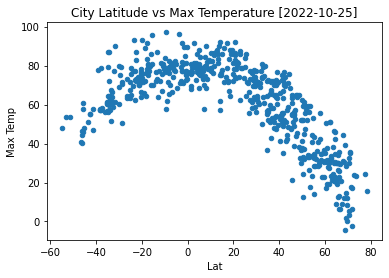

In [7]:
#Temperature [F] vs Latitude Scatter Plot

cities_temp_F_Plot = weather_data_clean.plot.scatter(x="Lat", y="Max Temp",title= f"City Latitude vs Max Temperature [{weather_data_date}]")
plt.savefig(f"{Output_Folder}TempVsLatScatterPLT_{weather_data_date}.png")
plt.show()

#### Zero degrees latitude is the line designating the Equator. We can see how in general temeperatures are warmer closer to the Ecuator and colder towards the poles. We can also distinguish that the North Pole seems to be colder than the South Pole.

### Latitude vs. Humidity Plot

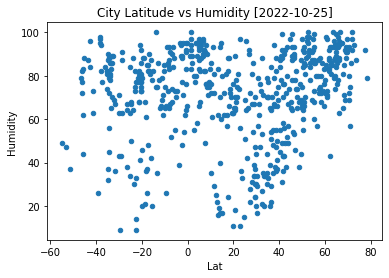

In [8]:
#Humidity (%) vs. Latitude Scatter Plot

cities_humidity_Plot = weather_data_clean.plot.scatter(x="Lat", y="Humidity", title= f"City Latitude vs Humidity [{weather_data_date}]")
plt.savefig(f"{Output_Folder}HumVsLatScatterPLT_{weather_data_date}.png")
plt.show()

#### In this chart we can notice that humidity is mostly evenly distribuited accross the world, however there is a trend of more humidity the closer we move towards the North Pole.

### Latitude vs. Cloudiness Plot

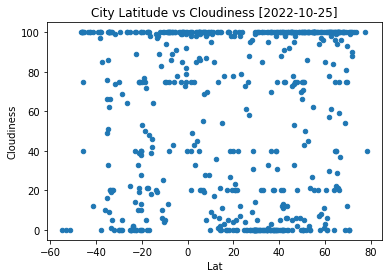

In [9]:
#Cloudiness (%) vs. Latitude Scatter Plot

cities_cloudiness_Plot = weather_data_clean.plot.scatter(x="Lat", y="Cloudiness", title= f"City Latitude vs Cloudiness [{weather_data_date}]")
plt.savefig(f"{Output_Folder}CloudVsLatScatterPLT_{weather_data_date}.png")
plt.show()

#### In this chart we notice that is hard to find a place that is not cloudy around the Equator, but on the contrary, the SouthPole is mostly clear.

### Latitude vs. Wind Speed Plot

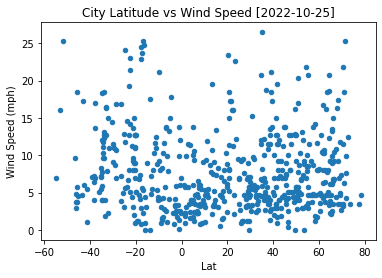

In [10]:
#Wind Speed (mph) vs. Latitude Scatter Plot

cities_windspeed_Plot = weather_data_clean.plot.scatter(x="Lat",
                                                        y="Wind Speed",
                                                        title= f"City Latitude vs Wind Speed [{weather_data_date}]",
                                                        ylabel="Wind Speed (mph)"
                                                       )
plt.savefig(f"{Output_Folder}WindSPVsLatScatterPLT_{weather_data_date}.png")
plt.show()

#### In this chart we notice that most of the places around the world have windspeeds of less than 10mph. Sustained winds of 21mph or higher are start to be considered a threat to life and property, a low threat though, and we can see that there is no such thing around the Ecuator.

## Linear Regression

### Cities Division by Hemispheres

#### Northern Hemisphere Cities Identification

In [11]:
# Cities Division by Northern Hemisphere 

Northern_Hem_Cities_df = weather_data_clean.loc[(weather_data_clean["Lat"]>=0)]
display(Northern_Hem_Cities_df)




,City_ID,City,Cloudiness,Country,Date,Date Converted,Humidity,Lat,Lng,Max Temp,Wind Speed
1,2122090,Pevek,12,RU,1666723215,2022-10-25 18:40:15,91,69.7008,170.3133,0.32,7.38
3,3423146,Ilulissat,75,GL,1666723216,2022-10-25 18:40:16,93,69.2167,-51.1000,28.42,3.44
5,1733953,Lahad Datu,100,MY,1666723217,2022-10-25 18:40:17,93,5.0268,118.3270,75.92,3.58
6,6165406,Thompson,100,CA,1666723217,2022-10-25 18:40:17,86,55.7435,-97.8558,28.56,11.50
9,2022572,Khatanga,88,RU,1666723219,2022-10-25 18:40:19,97,71.9667,102.5000,6.66,7.58
...,...,...,...,...,...,...,...,...,...,...,...
567,1252795,Yanam,0,IN,1666723586,2022-10-25 18:46:26,81,16.7333,82.2167,73.96,0.58
568,1636544,Manado,40,ID,1666723587,2022-10-25 18:46:27,100,1.4870,124.8455,75.97,2.30
569,5959326,Gananoque,92,CA,1666723588,2022-10-25 18:46:28,74,44.3334,-76.1661,75.47,11.18
570,687191,Zhelyabovka,73,UA,1666723589,2022-10-25 18:46:29,78,45.3988,34.7578,55.08,6.91


#### Southern Hemisphere Cities Identification

In [12]:
# Cities Division by Southern Hemisphere

Southern_Hem_Cities_df = weather_data_clean.loc[(weather_data_clean["Lat"]<0)]
display(Southern_Hem_Cities_df)

,City_ID,City,Cloudiness,Country,Date,Date Converted,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3883457,Lebu,85,CL,1666723213,2022-10-25 18:40:13,77,-37.6167,-73.6500,58.46,13.62
2,3369157,Cape Town,20,ZA,1666723014,2022-10-25 18:36:54,86,-33.9258,18.4232,64.11,18.41
4,964420,Port Elizabeth,20,ZA,1666723024,2022-10-25 18:37:04,81,-33.9180,25.5701,64.09,12.66
7,3833367,Ushuaia,0,AR,1666723218,2022-10-25 18:40:18,49,-54.8000,-68.3000,47.82,6.91
8,4032243,Vaini,75,TO,1666723030,2022-10-25 18:37:10,68,-21.2000,-175.2000,69.96,9.22
...,...,...,...,...,...,...,...,...,...,...,...
561,3348313,Huambo,98,AO,1666723581,2022-10-25 18:46:21,86,-12.7761,15.7392,63.66,5.50
562,2063036,Port Lincoln,86,AU,1666723582,2022-10-25 18:46:22,90,-34.7333,135.8667,56.41,7.74
563,2191911,Dargaville,10,NZ,1666723582,2022-10-25 18:46:22,84,-35.9333,173.8833,56.01,5.14
564,3936456,Lima,100,PE,1666723311,2022-10-25 18:41:51,65,-12.0432,-77.0282,71.91,10.36


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8665176834880556
The r-squared value is: 0.750852895797506


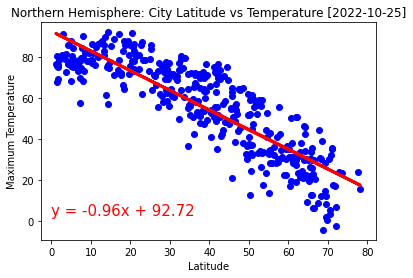

In [13]:
#Northern Hemisphere: Temperature (F) vs. Latitude Linear Regression

x = Northern_Hem_Cities_df["Lat"]
y = Northern_Hem_Cities_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y,  color='blue')
plt.plot(x, regress_values,"r-", linewidth=3)
plt.annotate(line_eq,(0,3),fontsize=15,color="red")
plt.ylabel('Maximum Temperature')
plt.xlabel('Latitude')
plt.title(f"Northern Hemisphere: City Latitude vs Temperature [{weather_data_date}]")

print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.savefig(f"{Output_Folder}NHemTempVsLatLinReg_{weather_data_date}.png")
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6698162184070604
The r-squared value is: 0.44865376644113486


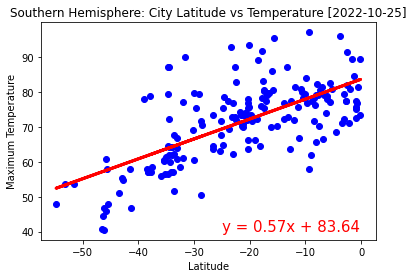

In [14]:
#Southern Hemisphere: Temperature (F) vs. Latitude Linear Regression

x = Southern_Hem_Cities_df["Lat"]
y = Southern_Hem_Cities_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y,  color='blue')
plt.plot(x, regress_values,"r-", linewidth=3)
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.ylabel('Maximum Temperature')
plt.xlabel('Latitude')
plt.title(f"Southern Hemisphere: City Latitude vs Temperature [{weather_data_date}]")

print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.savefig(f"{Output_Folder}SHemTempVsLatLinReg_{weather_data_date}.png")
plt.show()

#### As mentioned before, we can see how the further we go from the Ecuator, the colder the temperature gets. However, we can notice on these 2 charts how the rate of change is greater towards the North Pole.

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24273830473763855
The r-squared value is: 0.05892188458690268


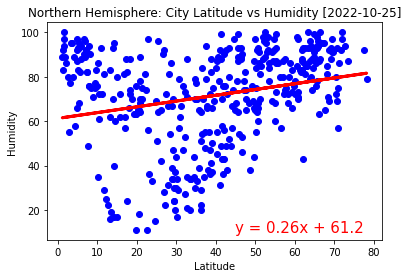

In [15]:
#Northern Hemisphere: Humidity (%) vs. Latitude Linear Regression

x = Northern_Hem_Cities_df["Lat"]
y = Northern_Hem_Cities_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y,  color='blue')
plt.plot(x, regress_values,"r-", linewidth=3)
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title(f"Northern Hemisphere: City Latitude vs Humidity [{weather_data_date}]")

print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.savefig(f"{Output_Folder}NHemHumVsLatLinReg_{weather_data_date}.png")
plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08913398100886721
The r-squared value is: 0.0079448665704891


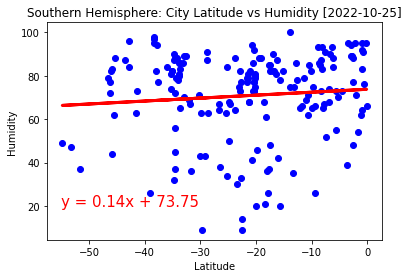

In [16]:
#Southern Hemisphere: Humidity (%) vs. Latitude Linear Regression

x = Southern_Hem_Cities_df["Lat"]
y = Southern_Hem_Cities_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y,  color='blue')
plt.plot(x, regress_values,"r-", linewidth=3)
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title(f"Southern Hemisphere: City Latitude vs Humidity [{weather_data_date}]")

print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.savefig(f"{Output_Folder}SHemHumVsLatLinReg_{weather_data_date}.png")
plt.show()

#### Humidity linear regressions show, how towards the South Pole Humidity tends to be around 60%, where in the North Pole it goes in average from 60 to 80, again with a greater rate of change moving towards the North Pole.

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12799595369556313
The r-squared value is: 0.01638296416243674


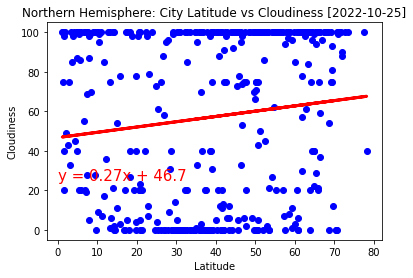

In [17]:
#Northern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression

x = Northern_Hem_Cities_df["Lat"]
y = Northern_Hem_Cities_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y,  color='blue')
plt.plot(x, regress_values,"r-", linewidth=3)
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title(f"Northern Hemisphere: City Latitude vs Cloudiness [{weather_data_date}]")

print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.savefig(f"{Output_Folder}NHemCloudVsLatLinReg_{weather_data_date}.png")
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1879102945264478
The r-squared value is: 0.03531027878901636


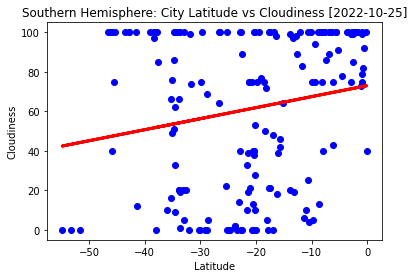

In [18]:
#Southern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression

x = Southern_Hem_Cities_df["Lat"]
y = Southern_Hem_Cities_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y,  color='blue')
plt.plot(x, regress_values,"r-", linewidth=3)
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title(f"Southern Hemisphere: City Latitude vs Cloudiness [{weather_data_date}]")

print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.savefig(f"{Output_Folder}SHemCloudVsLatLinReg_{weather_data_date}.png")
plt.show()

#### Cloudiness seems to be evenly distribuited around the globe, showing similar rate of change when moving from the Ecuator towards the North, compared to going towards the South. It even shows similar percentages.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.17971578267625868
The r-squared value is: 0.03229776254294024


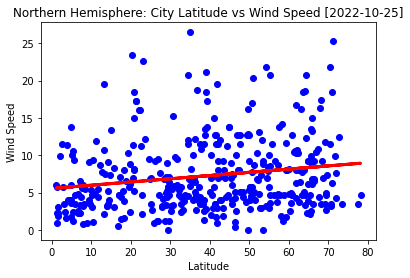

In [19]:
#Northern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression

x = Northern_Hem_Cities_df["Lat"]
y = Northern_Hem_Cities_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y,  color='blue')
plt.plot(x, regress_values,"r-", linewidth=3)
plt.annotate(line_eq,(0,29),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title(f"Northern Hemisphere: City Latitude vs Wind Speed [{weather_data_date}]")

print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.savefig(f"{Output_Folder}NHemWindSPVsLatLinReg_{weather_data_date}.png")
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.19539342205984286
The r-squared value is: 0.03817858938425589


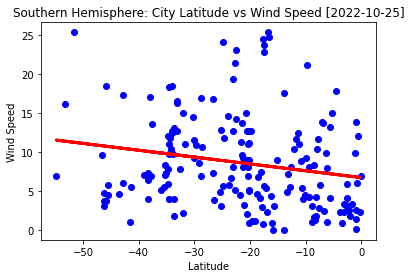

In [20]:
#Southern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression

x = Southern_Hem_Cities_df["Lat"]
y = Southern_Hem_Cities_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y,  color='blue')
plt.plot(x, regress_values,"r-", linewidth=3)
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title(f"Southern Hemisphere: City Latitude vs Wind Speed [{weather_data_date}]")

print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.savefig(f"{Output_Folder}SHemWindSPVsLatLinReg_{weather_data_date}.png")
plt.show()

#### When looking at Wind Speeds again we can see that most of the world has wind speeds of less than 10mph. However we can see a slight difference towars South of the Ecuator, where seems to be windier than the North